<a href="https://colab.research.google.com/github/KerolosAmgad-prog/Student_profermance_model/blob/main/Students_Performance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # upload the Data file

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
print(df.head())  #Showing the head of file , from 0 : 4 rows

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


# Exploratort Data Analysis (EDA)

In [5]:
print(df.isnull().sum()) # to check if there missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
print(df.describe()) # to show the decription of data

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_Layout'

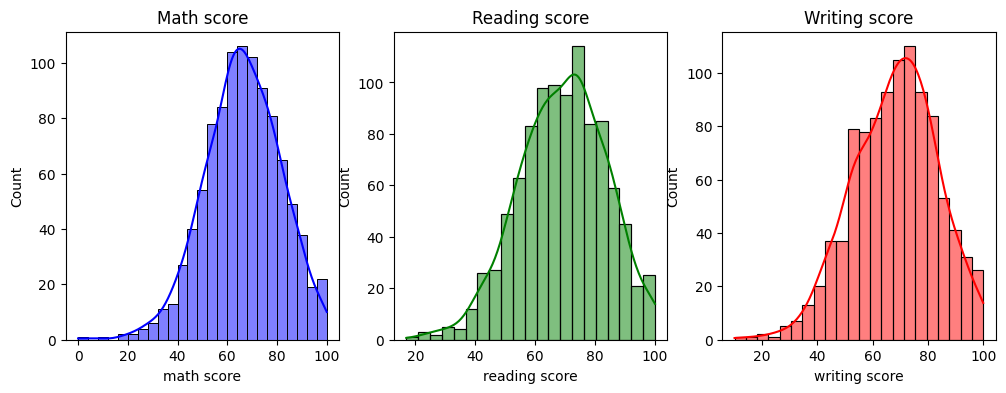

In [22]:

#the math score histogram
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['math score'],kde=True,color='blue') # kde is curve to show the graphs values well
plt.title('Math score')
#the Reading score histogram
plt.subplot(1,3,2)
sns.histplot(df['reading score'],kde=True,color='green')
plt.title("Reading score")
#the Writing score histogram
plt.subplot(1,3,3)
sns.histplot(df['writing score'],kde=True,color='red')
plt.title("Writing score")
#showing the graphs
plt.tight_Layout()
plt.show()


# Data Preprocessing

**Handle** **Categorical** **Variables**

In [19]:
df_encoded=pd.get_dummies(df,columns=
 ['gender'
 ,
  'race/ethnicity'
 ,'parental level of education'
 ,'lunch'
 ,
  'test preparation course']).astype(int)
X=df_encoded.drop(columns=['math score','reading score','writing score'],axis=1)
y=df_encoded[['math score','reading score','writing score']]

In [16]:
print(X) # 1 For Male ,0 For Female

     gender_female  gender_male  race/ethnicity_group A  \
0                1            0                       0   
1                1            0                       0   
2                1            0                       0   
3                0            1                       1   
4                0            1                       0   
..             ...          ...                     ...   
995              1            0                       0   
996              0            1                       0   
997              1            0                       0   
998              1            0                       0   
999              1            0                       0   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                         1                       0                       0   
1                         0                       1                       0   
2                         1                       0   

In [17]:
print(y)

     math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]


# Train_Test_split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
print(X_train)

     gender_female  gender_male  race/ethnicity_group A  \
29               1            0                       0   
535              1            0                       0   
695              1            0                       0   
557              0            1                       0   
836              0            1                       0   
..             ...          ...                     ...   
106              1            0                       0   
270              0            1                       0   
860              1            0                       0   
435              0            1                       0   
102              1            0                       0   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
29                        0                       0                       1   
535                       0                       1                       0   
695                       0                       0   

In [25]:
print(X_test)

     gender_female  gender_male  race/ethnicity_group A  \
521              1            0                       0   
737              1            0                       0   
740              0            1                       0   
660              0            1                       0   
411              0            1                       0   
..             ...          ...                     ...   
408              1            0                       0   
332              0            1                       0   
208              1            0                       0   
613              1            0                       0   
78               1            0                       0   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
521                       0                       1                       0   
737                       1                       0                       0   
740                       0                       0   

In [26]:
print(y_train)

     math score  reading score  writing score
29           62             70             75
535          66             83             83
695          79             89             86
557          61             67             66
836          73             64             57
..          ...            ...            ...
106          87            100            100
270          69             63             61
860          53             62             53
435          50             48             53
102          85             91             89

[800 rows x 3 columns]


In [27]:
print(y_test)

     math score  reading score  writing score
521          91             86             84
737          53             66             73
740          80             73             72
660          74             77             73
411          84             83             78
..          ...            ...            ...
408          52             57             56
332          62             56             53
208          74             81             76
613          65             77             74
78           61             74             72

[200 rows x 3 columns]


# Feature Scaling

In [28]:
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
print('The X_train after scaling : \n',X_train_scaled) # the range bet [-3:3]

The X_train after scaling : 
 [[ 0.94880848 -0.94880848 -0.30723158 ...  0.72776144 -0.73178456
   0.73178456]
 [ 0.94880848 -0.94880848 -0.30723158 ... -1.37407665  1.36652242
  -1.36652242]
 [ 0.94880848 -0.94880848 -0.30723158 ... -1.37407665 -0.73178456
   0.73178456]
 ...
 [ 0.94880848 -0.94880848 -0.30723158 ...  0.72776144 -0.73178456
   0.73178456]
 [-1.05395348  1.05395348 -0.30723158 ... -1.37407665  1.36652242
  -1.36652242]
 [ 0.94880848 -0.94880848 -0.30723158 ...  0.72776144 -0.73178456
   0.73178456]]


In [30]:
print('The X_test after scaling : \n',X_test_scaled)  # the range bet [-3:3]

The X_test after scaling : 
 [[ 0.94880848 -0.94880848 -0.30723158 ...  0.72776144 -0.73178456
   0.73178456]
 [ 0.94880848 -0.94880848 -0.30723158 ... -1.37407665  1.36652242
  -1.36652242]
 [-1.05395348  1.05395348 -0.30723158 ...  0.72776144 -0.73178456
   0.73178456]
 ...
 [ 0.94880848 -0.94880848 -0.30723158 ... -1.37407665 -0.73178456
   0.73178456]
 [ 0.94880848 -0.94880848 -0.30723158 ...  0.72776144 -0.73178456
   0.73178456]
 [ 0.94880848 -0.94880848 -0.30723158 ...  0.72776144  1.36652242
  -1.36652242]]


# Train multivariate Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)

# Evaluate model performance

In [33]:
from sklearn.metrics import mean_squared_error,r2_score
metrics={}
for i,subject in enumerate(['math score','reading score','writing score']):
  rmse=np.sqrt(mean_squared_error(y_test[subject],y_pred[:,i]))
  r2=r2_score(y_test[subject],y_pred[:,i])
  metrics[subject]={'Rmse':rmse,'R2':r2}

In [37]:
for subject, score in metrics.items():
  print(f"{subject}:\n")
  print(f"RMSE={score['Rmse']:.2f}")
  print(f"R2={score['R2']:.2f}\n")

math score:

RMSE=14.16
R2=0.18

reading score:

RMSE=13.79
R2=0.16

writing score:

RMSE=13.32
R2=0.26



# Visualize Predictions vs Actuals

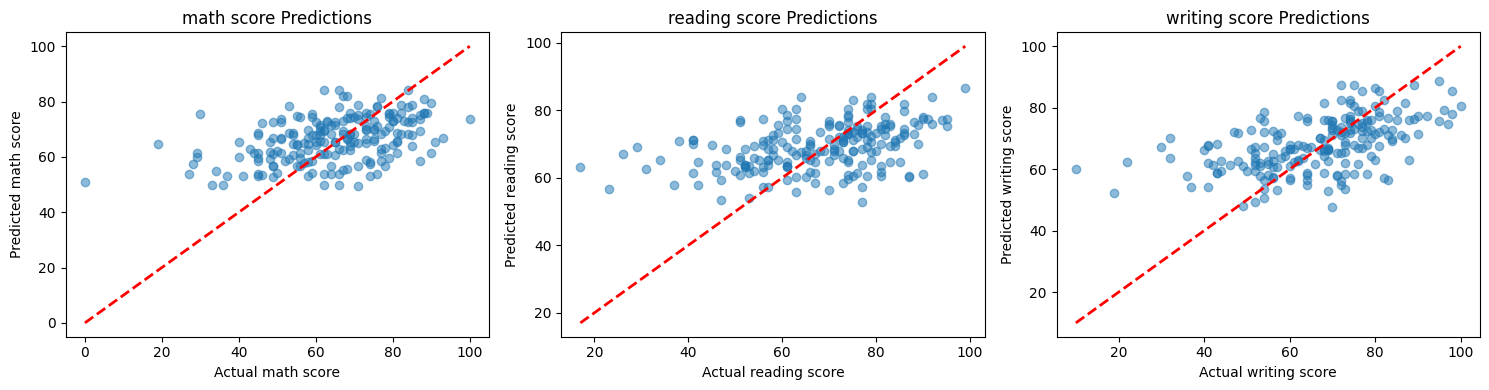

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (subject, ax) in enumerate(zip(['math score', 'reading score', 'writing score'], axes)):
    ax.scatter(y_test[subject], y_pred[:, i], alpha=0.5)
    ax.plot([y_test[subject].min(), y_test[subject].max()],
            [y_test[subject].min(), y_test[subject].max()],
            'r--', lw=2)
    ax.set_xlabel(f"Actual {subject}")
    ax.set_ylabel(f"Predicted {subject}")
    ax.set_title(f"{subject} Predictions")

plt.tight_layout()
plt.show()